# Les k-Plus Proches Voisins : en pratique

Dans le TP4 nous avons implémenté quelques méthodes de base en Machine Learning (Apprentissage Automatique) :
- découpage train/test d'un dataset
- normalisation
- classification par k-PPV (méthode de base et variante pondérée)
- évaluation d'un classifieur

Le fait d'en écrire le code a permis d'en maîtriser le fonctionnement. Cependant, à l'avenir vous devrez utiliser des librairies qui proposent ces méthodes déjà implémentées.

> [Scikit-learn](https://scikit-learn.org/) est une bibliothèque libre Python destinée à l'apprentissage automatique.
>
> Nous y retrouverons notamment :
> - la méthode `train_test_split()` pour découper un dataset en deux sous-ensembles d'entraînement et de test
> - les méthodes `MinMaxScaler()` et `StandardScaler()` pour normaliser le dataset
> - la méthode `KNeighborsClassifier()` pour prédire par k-PPV
>


Vous commencerez par installer la bibliothèque sur votre machine : `pip install scikit-learn`

---

### Exercice 1 : prise en main de Scikit-learn

1. Comme dans le TP4, chargez les données `zoo.csv` dans un Dataframe puis en extraire deux tableaux NumPy `X` (matrice 100x16) et `y` (vecteur des 100 labels de classe)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

zoo = pd.read_csv("./donnees/zoo.csv")

X = np.array(zoo.iloc[:, 1:-1])
y = np.array(zoo['type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([1, 2, 3, 4, 5, 6, 7]), array([18, 10,  3,  8,  2,  3,  6]))
(array([1, 2, 3, 4, 5, 6, 7]), array([23, 10,  2,  5,  1,  5,  4]))


2. Procédez au découpage du dataset (`X` et `y`) en deux sous-ensembles de même taille (`X_train`, `X_test`, `y_train`, `y_test`) en utilisant la méthode `train_test_split()` de Scikit-learn (consultez la documentation). Puis vérifiez l'équilibre des classes entre les deux sous-ensembles.

In [12]:
from sklearn.model_selection import train_test_split

(array([1, 2, 3, 4, 5, 6, 7]), array([21,  9,  3,  4,  1,  6,  6]))
(array([1, 2, 3, 4, 5, 6, 7]), array([20, 11,  2,  9,  2,  2,  4]))


3. Normalisez les données en utilisant au choix l'une des méthodes suivantes : `MinMaxScaler()` ou `StandardScaler()` (consultez la doc)

In [15]:
# normalisation min/max z = (x-min)/(max-min)
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler

In [10]:
# normalisation centrée réduite z = (x-u)/s avec u la moyenne et s l'écart type
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

Xn_train = scaler.transform(X_train)
xn_test = scaler.transform(X_test)
Xn_train

array([[-0.71774056, -0.531085  ,  0.68599434, -0.68599434, -0.62360956,
        -0.81649658, -1.22474487, -1.12815215, -2.        ,  0.59274898,
        -0.29488391, -0.5       , -1.22634105, -1.60356745, -0.36927447,
        -0.84101206],
       [ 1.39326109, -0.531085  , -1.45773797,  1.45773797, -0.62360956,
        -0.81649658, -1.22474487,  0.88640526,  0.5       ,  0.59274898,
        -0.29488391, -0.5       ,  0.75162838,  0.62360956,  2.7080128 ,
         0.4098735 ],
       [-0.71774056, -0.531085  ,  0.68599434, -0.68599434, -0.62360956,
         1.22474487,  0.81649658,  0.88640526,  0.5       , -1.68705478,
        -0.29488391,  2.        , -1.22634105,  0.62360956, -0.36927447,
         0.17160959],
       [-0.71774056, -0.531085  ,  0.68599434, -0.68599434, -0.62360956,
         1.22474487,  0.81649658, -1.12815215, -2.        , -1.68705478,
        -0.29488391, -0.5       ,  1.7406131 , -1.60356745, -0.36927447,
        -0.4240502 ],
       [-0.71774056,  1.88293774,  0

4. Utilisez la classe `KNeighborsClassifier` de Scikit-learn pour prédire les classes de chaque données de l'ensemble `X_test` par la méthode k-PPV (non-pondérée) avec $k=2$ (consultez la documentation)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='brute')
classifier.fit(Xn_train, y_train)

y_pred = classifier.predict(xn_test)

5. Evaluez ce classifieur en calculant le taux d'erreurs

In [17]:
def error_prediction(y_pred, y):
    return sum(y_pred != y) / y.size

error_prediction(y_pred, y_test)

0.04

In [20]:
def eval_parameter(k, Xn_train, Xn_test, y_train, y_test):
    classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='brute')
    classifier.fit(Xn_train, y_train)
    
    y_pred = classifier.predict(xn_test)
    return error_prediction(y_pred, y_test)

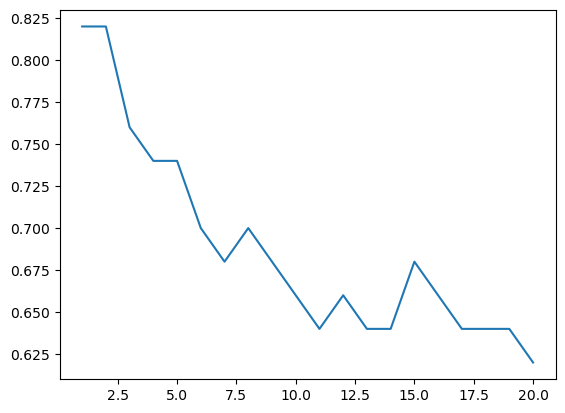

In [24]:
errors = [eval_parameter(k, Xn_train, xn_test, y_train, y_test) for k in range(1,21)]
plt.plot(range(1,21), errors)
plt.show()

6. Modifiez les paramètres du classifieur (question 4) pour tester (et évaluer) différentes méthodes de prédication :
- différentes valeurs pour $k$
- avec ou sans normalisation des données
- variante pondérée de k-PPV
- etc.

---

### Exercice 2 : pour vous entraîner... et aller plus loin

Vous trouverez deux nouveaux datasets dans le repertoire `donnees` :
- le dataset `iris` : contenant les descriptions de fleurs (iris) selon 4 descripteurs numériques. La tâche de prédiction porte sur le type d'Iris (3 catégories).

- le dataset `card_transdata` : contenant les descriptions de transactions par cartes bancaires selont 7 descripteurs numériques ou booléens. La tâche de prédiction consiste à détecter les fraudes (2 catégories).

Votre travail consiste, pour chacune des deux tâches de prédiction ci-dessus, à proposer un classifieur de type k-PPV le plus efficace possible. 